In [57]:
import pandas as pd
import seaborn as sns

In [58]:
data = pd.read_csv('/Users/mukeshgupta/Desktop/Machine-Learning/bank-marketing-master/bank-additional-full.csv',sep=';')

print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [60]:
#Change categorical data from 'object' type to 'category' type

data['job'] = data['job'].astype('category')
data['marital'] = data['marital'].astype('category')
data['education'] = data['education'].astype('category')
data['default'] = data['default'].astype('category')
data['housing'] = data['housing'].astype('category')
data['loan'] = data['loan'].astype('category')
data['contact'] = data['contact'].astype('category')
data['month'] = data['month'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')
data['poutcome'] = data['poutcome'].astype('category')
data['y'] = data['y'].astype('category')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null category
marital           41188 non-null category
education         41188 non-null category
default           41188 non-null category
housing           41188 non-null category
loan              41188 non-null category
contact           41188 non-null category
month             41188 non-null category
day_of_week       41188 non-null category
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null category
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null category
dtypes: category(11), float64

## Visualizations 

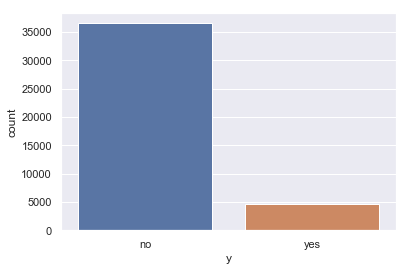

In [62]:
sns.set()
sns.countplot(data['y']);

As seen in the histogram above, the majority of clients do **not** subscribe to a term deposit.

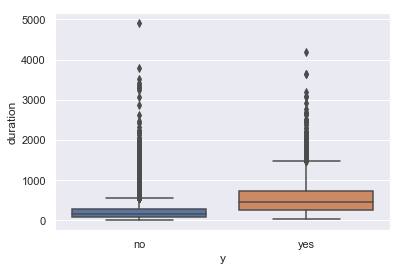

In [63]:
sns.boxplot(x='y', y='duration',data=data);

The **duration** is highly correlated with **y** however since the duration is not known before a call is performed it will be discarded in order to have a realistic predictive model.

However, only duration was found to be significant among the independent variables.

## Classification

In [64]:
data['pdays'].value_counts()

data = data.drop(['pdays'],axis=1) #Drop variable with large amount of missing value


In [65]:
#Encode categorical variables as numeric for easier analysis
data['y'] = data['y'].replace({'no':0, 'yes':1})

data_onehot = pd.get_dummies(data, columns=['job','default','housing','contact','marital','education','loan','month',
                                            'day_of_week','poutcome'])

data['y'].head(1)
data_onehot.head(10)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
5,45,198,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
7,41,217,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
8,24,380,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
9,25,50,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
from sklearn.model_selection import train_test_split

# create training and testing vars
X = data_onehot.drop('y',axis=1)
y = data_onehot['y']
#print(X)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Scale variables

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### Dummy Classifier

In [12]:
#Evaluate Dummy Classifier to form a baseline

from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train_std, y_train)

y_dummy_predictions = dummy_majority.predict(X_test_std)

print('The Dummy Classifier has an accuracy score of: {:.3f}'.format(dummy_majority.score(X_test_std, y_test)))

The Dummy Classifier has an accuracy score of: 0.887


### Gaussian Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


gnb = GaussianNB()
gnb.fit(X_train_std, y_train)
preds = gnb.predict(X_test_std)

print('The Gaussian NB Classifier has an accuracy score of: {:.3f}'.format(accuracy_score(y_test, preds)))

The Gaussian NB Classifier has an accuracy score of: 0.710


The Gaussian NB classifier performs worse than the Dummy Classifier. However, *accuracy* is not  a good measure for the model due to the imbalance of our dependent variable **y**. Since we want to increase the fraction of positive predictions, we should use **_precision_** as our evaluation measure.

In [14]:
from sklearn.metrics import precision_score

print('Precision for Gaussian NB Classifier: {:.3f}'.format(precision_score(y_test, preds)))

Precision for Gaussian NB Classifier: 0.259


### Support Vector Machine

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

clf=SVC()
svm = clf.fit(X_train_std, y_train)
svm_predicted = svm.predict(X_test_std)
confusion = confusion_matrix(y_test, svm_predicted)

print('Accuracy for SVM Classifier: {:.3f}'.format(accuracy_score(y_test, svm_predicted)))
print('Precision for SVM Classifier: {:.3f}'.format(precision_score(y_test, svm_predicted)))

Accuracy for SVM Classifier: 0.909
Precision for SVM Classifier: 0.667
